1. intro de cómo creé el dataset de esg y poner el link, y el link del 2024
2.
3. outliers pa qué?
4. smoot synthetic hacer valores sinteticos para embarajar para balancear el dataset? (ha llegado el día)

# Write the title at the end of the project, alongside with the summary

# About the datasets used in this notebook:

## 2024 Holdings Dataset (´fund_2024´)
The dataset `fund_2024` focuses on the **fund's equity holdings in 2024**, providing detailed information on each company including industry, region, country, market value, voting rights, ownership, and portfolio weight. 

**Data Sources & Cleaning:**  
- Original data was obtained from the GPFG official website: [GPFG Investments](https://www.nbim.no/en/investments/all-investments/#/).  
- In this project, the first step was conducted in the notebook named `analysis`, where the dataset `fund_2024` was cleaned and prepared, and an exploratory data analysis was performed. This included renaming columns, calculating portfolio weights, and ensuring consistency across the dataset.


## ESG Engagement Dataset (`esg_2024`)
The dataset `esg_2024` contains companies with whom the fund engaged in dialogues during 2024 on **Environmental, Social, Governance, and Climate Change topics**.  

These dialogues reflect the fund’s **responsible investment strategy**. They are conducted to encourage companies to improve ESG practices, align with sustainability goals, or ensure that long-term risks related to ESG factors are managed appropriately. Being included in this dataset does not imply non-compliance, but rather that the company was a focus of engagement for monitoring and improvement purposes.

The data was sourced from the **annual overview of company dialogues** published by Norges Bank Investment Management: [GPFG Company Dialogues 2024](https://www.nbim.no/en/responsible-investment/engaging-with-companies/annual-overview-of-company-dialogues/).  
- In the original table, an “X” indicated that a dialogue took place.  
- The “X” values were converted to `1`s in the ESG columns (`Environmental`, `Social`, `Governance`, `Climate_change`) in Excel.  
- Some irrelevant columns were removed, and the cleaned table was then imported into Python as a DataFrame using Pandas.

This dataset provides a **binary indicator for ESG engagement**, enabling analysis of which companies were involved in dialogues and across which ESG topics.


# Setting up and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


In [39]:
esg_2024 = pd.read_excel('esg_2024.xlsx')
fund_2024 = pd.read_excel('clean_fund_2024.xlsx')
print(esg_2024.shape)
print(fund_2024.shape) 

(992, 5)
(8645, 8)


In [38]:
esg_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         992 non-null    object
 1   Environmental   992 non-null    int64 
 2   Social          992 non-null    int64 
 3   Governance      992 non-null    int64 
 4   Climate change  992 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 38.9+ KB


In [15]:
esg_2024.head(4)

,Company,Environmental,Social,Governance,Climate change
0,3M Co,1,1,1,0
1,A O Smith Corp,1,0,1,1
2,ABB Ltd,1,1,1,1
3,AbbVie Inc,0,1,1,0


In [40]:
#rename columns for clarity, reproducibility and easier merge
esg_2024.rename(columns={'Company':'Name',
                         'Climate change': 'Climate_change'}, inplace=True)
esg_2024.head(2)

,Name,Environmental,Social,Governance,Climate_change
0,3M Co,1,1,1,0
1,A O Smith Corp,1,0,1,1


In [16]:
fund_2024.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
0,Basic Materials,Asia,India,Aarti Industries Ltd,8265429,0.48,0.48,0.000643
1,Basic Materials,Europe,Lithuania,AB Grigeo,2506003,1.75,1.75,0.000195


In [ ]:
# Normalize the key field to ensure data integrity during the merge operation
esg_2024['Name'] = esg_2024['Name'].str.lower().str.strip()
fund_2024['Name'] = fund_2024['Name'].str.lower().str.strip()


In [57]:
# Merge datasets
fund_esg_2024 = pd.merge(fund_2024, esg_2024, on='Name', how='left')
print(fund_esg_2024.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8645 entries, 0 to 8644
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Industry          8645 non-null   object 
 1   Region            8645 non-null   object 
 2   Country           8645 non-null   object 
 3   Name              8645 non-null   object 
 4   Market_Value_USD  8645 non-null   int64  
 5   Voting            8645 non-null   float64
 6   Ownership         8645 non-null   float64
 7   Portfolio_Weight  8645 non-null   float64
 8   Environmental     936 non-null    float64
 9   Social            936 non-null    float64
 10  Governance        936 non-null    float64
 11  Climate_change    936 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 810.6+ KB
None


## Note about the merge 
Companies whose names did not have an exact match between the ESG dataset and the fund's investment dataset (56 companies) are left as missing values. These are considered "lost" because attempting a forced match through fuzzy or heuristic methods could introduce false positives due to minor spelling differences, abbreviations, or naming variations. Leaving them as missing maintains data integrity and transparency. The advantages of this approach are that it preserves reproducibility of the analysis, avoids misinterpretation errors in ML models or reports, and clearly documents that the final dataset covers approximately 94% of companies with ESG data, while the remaining unmatched cases are left as missing for safety.


In [ ]:
# Performing an inner merge  to see which ESG companies match exactly 
fund_esg_2024_inner = pd.merge(fund_2024, esg_2024, on='Name', how='inner')
print(fund_esg_2024_inner.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Industry          936 non-null    object 
 1   Region            936 non-null    object 
 2   Country           936 non-null    object 
 3   Name              936 non-null    object 
 4   Market_Value_USD  936 non-null    int64  
 5   Voting            936 non-null    float64
 6   Ownership         936 non-null    float64
 7   Portfolio_Weight  936 non-null    float64
 8   Environmental     936 non-null    int64  
 9   Social            936 non-null    int64  
 10  Governance        936 non-null    int64  
 11  Climate_change    936 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 87.9+ KB
None


In [ ]:
# Identify ESG companies that did not match the fund portfolio ---
missing_real_esg = esg_2024[~esg_2024['Name'].isin(fund_esg_2024_inner['Name'])]

# Count of missing
print("Number of companies missing in the merge", missing_real_esg.shape[0])

Number of companies missing in the merge 56


In [ ]:
#Quick inspection of unmatched companies looking for patterns
missing_real_esg[['Name', 'Environmental']].head(20)


,Name,Environmental
8,acerino1 sa,1
32,ale1andria real estate equities inc,1
47,american e1press co,0
70,argen1 se,0
91,a1a sa,1
92,a1alta coating systems ltd,1
93,a1iata group bhd,0
146,bri1mor property group inc,1
153,b1p inc,1
155,cai1abank sa,0


In [74]:
# Quick look at the companies missing looking for patterns
missing_real_esg.tail(10)

,Name,Environmental,Social,Governance,Climate_change
714,re1ford industrial realty inc,1,0,1,1
718,roblo1 corp,0,1,1,0
728,rt1 corp,1,1,1,1
777,sk hyni1 inc,1,1,1,1
859,te1as instruments inc,0,1,1,0
883,trita1 big bo1 reit plc,0,0,1,0
946,wal-mart de me1ico sab de cv,0,1,1,0
976,1p inc,0,1,1,0
977,1peng inc,1,1,1,1
978,1po inc,0,0,1,0


It appears that all occurrences of '1' in company names have been replaced with 'x', affecting names that originally contained an 'x'.  
To verify this transformation, a test will be conducted: a dataset consisting only of company names containing 'x' from the fund_2024 will be created, and an inner join with the ESG dataset will be performed.  
If the match is perfect, meaning the result has 56 rows corresponding to the previously unmatched companies, the next step will be to re-merge using the transformed names with '1's replaced by 'x'.


In [ ]:
# Replace all occurrences of '1' in the Name column with 'x'
missing_replaced = missing_real_esg.copy()
missing_replaced['Name'] = missing_replaced['Name'].str.replace('1', 'x')

#  checking the result of the replacement
missing_replaced[['Name']].head(10)


,Name
8,acerinox sa
32,alexandria real estate equities inc
47,american express co
70,argenx se
91,axa sa
92,axalta coating systems ltd
93,axiata group bhd
146,brixmor property group inc
153,bxp inc
155,caixabank sa


In [ ]:
#If the shape is 56 rows, which are the ones missing, the procedure will be correct
test_merge = pd.merge(fund_2024, missing_replaced, on='Name', how='inner')
print("Shape of test merge with replaced 'x':", test_merge.shape)

Shape of test merge with replaced 'x': (56, 12)


In [79]:
# #The test is succesful, proceeds to do the replacement in the esg_2024 dataset and re-merge
esg_2024['Name'] = esg_2024['Name'].str.replace('1', 'x')

In [83]:
#The merge with the corrected names
fund_esg_2024 = pd.merge(fund_2024, esg_2024, on = 'Name', how = 'left')
fund_esg_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8645 entries, 0 to 8644
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Industry          8645 non-null   object 
 1   Region            8645 non-null   object 
 2   Country           8645 non-null   object 
 3   Name              8645 non-null   object 
 4   Market_Value_USD  8645 non-null   int64  
 5   Voting            8645 non-null   float64
 6   Ownership         8645 non-null   float64
 7   Portfolio_Weight  8645 non-null   float64
 8   Environmental     992 non-null    float64
 9   Social            992 non-null    float64
 10  Governance        992 non-null    float64
 11  Climate_change    992 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 810.6+ KB


The merge has been successful: the ESG columns from the ESG dataset have now been fully integrated, resulting in the same number of rows as the ESG dataset. This indicates that all company names in both datasets matched correctly, leaving no missing information.


In [ ]:
#Fill the null values in the ESG columns with 0 and convert to integer type, since NaN means no engagement
cols_esg = ['Environmental', 'Social', 'Governance', 'Climate_change']
fund_esg_2024[cols_esg] = fund_esg_2024[cols_esg].fillna(0).astype(int)
fund_esg_2024.info()    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8645 entries, 0 to 8644
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Industry          8645 non-null   object 
 1   Region            8645 non-null   object 
 2   Country           8645 non-null   object 
 3   Name              8645 non-null   object 
 4   Market_Value_USD  8645 non-null   int64  
 5   Voting            8645 non-null   float64
 6   Ownership         8645 non-null   float64
 7   Portfolio_Weight  8645 non-null   float64
 8   Environmental     8645 non-null   int32  
 9   Social            8645 non-null   int32  
 10  Governance        8645 non-null   int32  
 11  Climate_change    8645 non-null   int32  
dtypes: float64(3), int32(4), int64(1), object(4)
memory usage: 675.5+ KB


In [86]:
# Create a new column 'ESG_any' that indicates if a company has any ESG engagement
fund_esg_2024["ESG_any"] = ((fund_esg_2024[["Environmental","Social","Governance","Climate_change"]].sum(axis=1)) > 0).astype(int)
fund_esg_2024.head(5)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight,Environmental,Social,Governance,Climate_change,ESG_any
0,Basic Materials,Asia,India,aarti industries ltd,8265429,0.48,0.48,0.000643,0,0,0,0,0
1,Basic Materials,Europe,Lithuania,ab grigeo,2506003,1.75,1.75,0.000195,0,0,0,0,0
2,Basic Materials,Europe,Spain,acerinox sa,44222411,1.81,1.81,0.003439,1,1,0,0,1
3,Basic Materials,Asia,Japan,achilles corp,346429,0.26,0.26,0.000027,0,0,0,0,0
4,Basic Materials,North America,Canada,aclara resources inc,93266,0.18,0.18,0.000007,0,0,0,0,0


# Brief Data Exploration


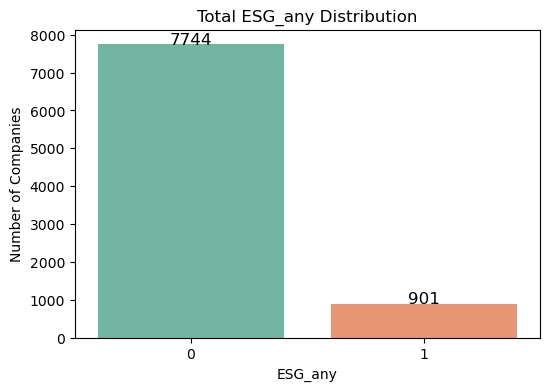

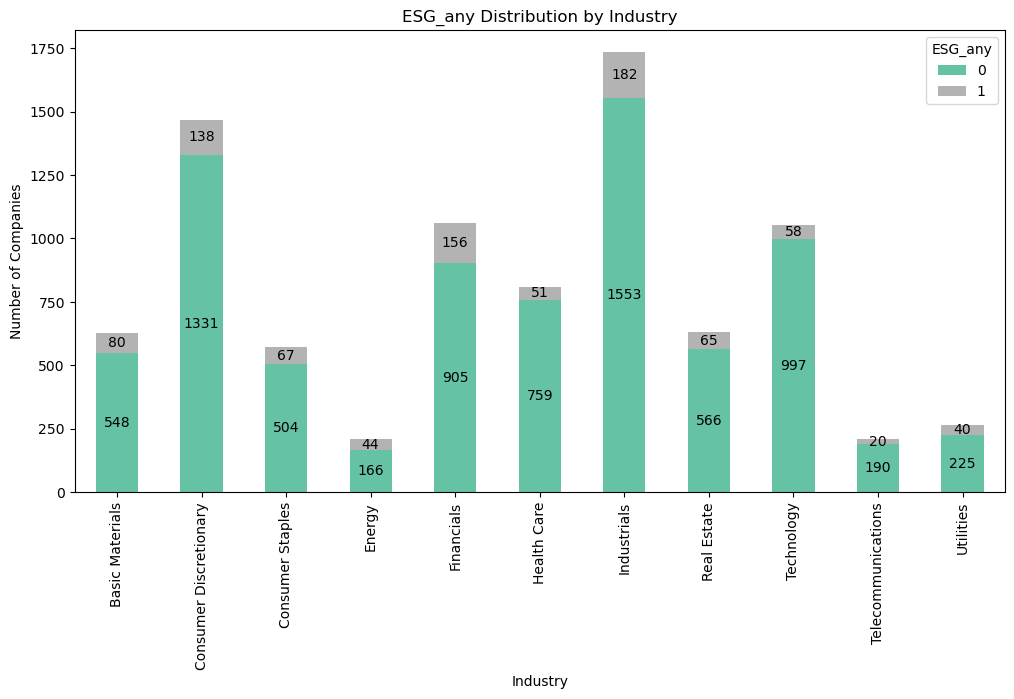

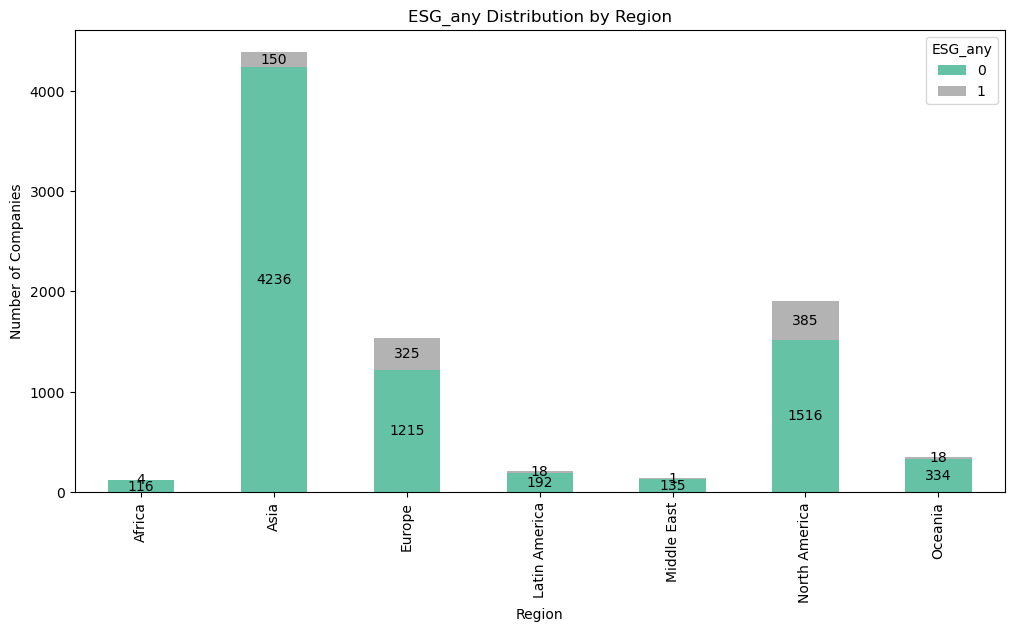

In [ ]:
def plot_esg_distribution(df):
    """
    Plots ESG_any distribution: total, by Industry, and by Region.
    Shows counts on top of bars.
    """
    # Total 
    total_counts = df['ESG_any'].value_counts()
    plt.figure(figsize=(6,4))
    sns.barplot(x=total_counts.index, y=total_counts.values, palette='Set2')
    for i, v in enumerate(total_counts.values):
        plt.text(i, v + 5, str(v), ha='center', fontsize=12)
    plt.title('Total ESG_any Distribution')
    plt.xlabel('ESG_any')
    plt.ylabel('Number of Companies')
    plt.show()

    # By Industry 
    industry_counts = df.groupby('Industry')['ESG_any'].value_counts().unstack(fill_value=0)
    industry_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
    plt.title('ESG_any Distribution by Industry')
    plt.ylabel('Number of Companies')
    plt.xlabel('Industry')
    for i, row in enumerate(industry_counts.values):
        plt.text(i, row[0]/2, str(row[0]), ha='center', va='center', fontsize=10)
        plt.text(i, row[0] + row[1]/2, str(row[1]), ha='center', va='center', fontsize=10)
    plt.show()

    # By Region 
    region_counts = df.groupby('Region')['ESG_any'].value_counts().unstack(fill_value=0)
    region_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
    plt.title('ESG_any Distribution by Region')
    plt.ylabel('Number of Companies')
    plt.xlabel('Region')
    for i, row in enumerate(region_counts.values):
        plt.text(i, row[0]/2, str(row[0]), ha='center', va='center', fontsize=10)
        plt.text(i, row[0] + row[1]/2, str(row[1]), ha='center', va='center', fontsize=10)
    plt.show()

# Usage
plot_esg_distribution(fund_esg_2024)


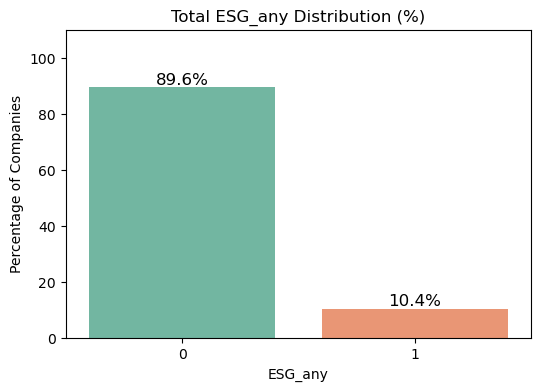

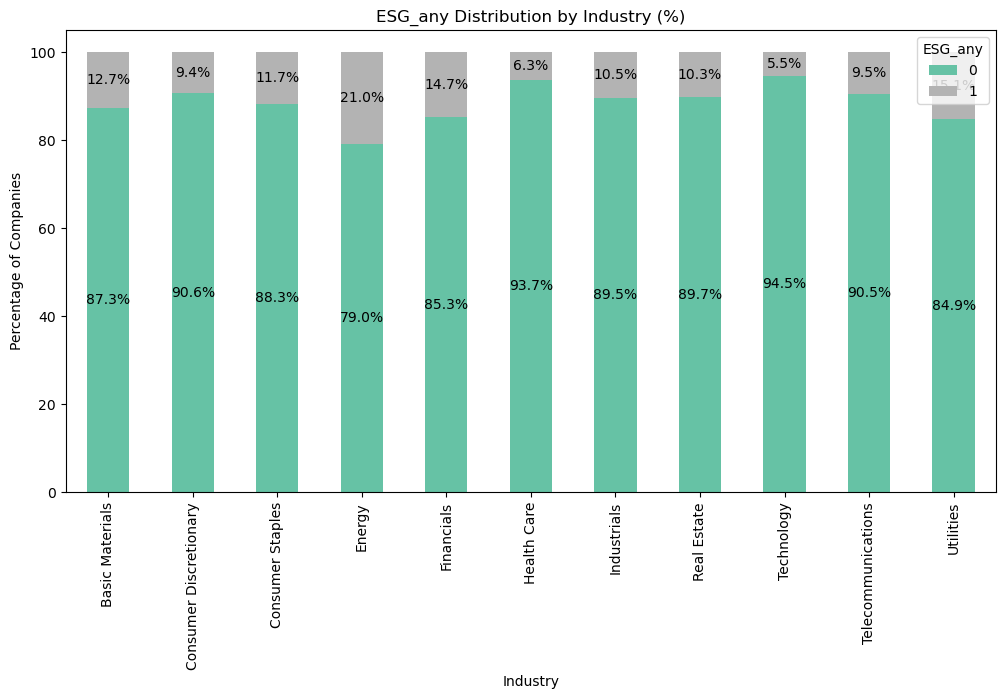

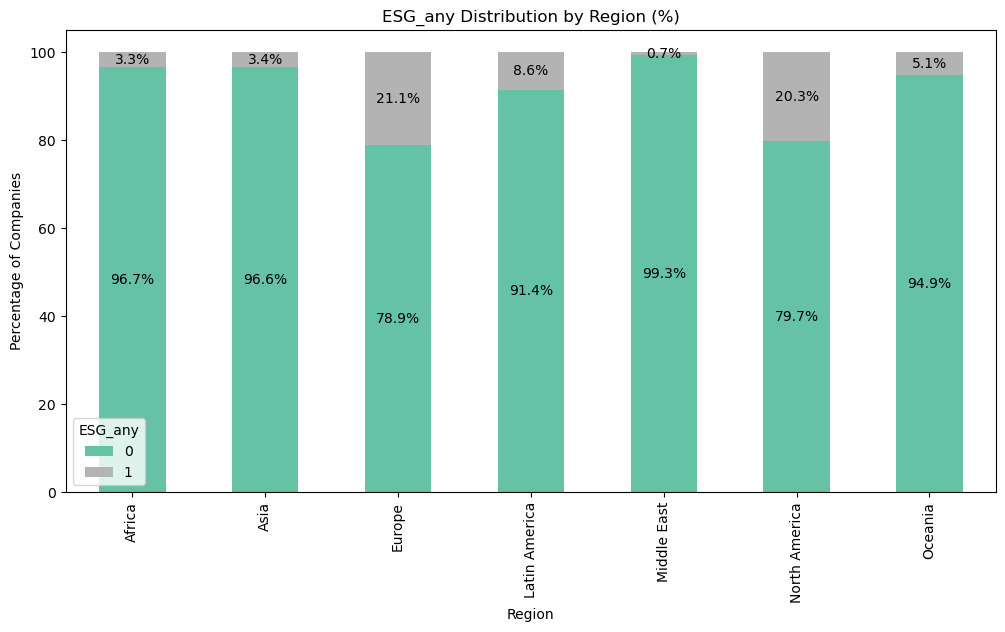

In [ ]:
def plot_esg_distribution_percent(df):
    """
    Plots ESG_any distribution as percentages: total, by Industry, and by Region.
    Shows percentages on top of bars.
    """
    # Total 
    total_counts = df['ESG_any'].value_counts(normalize=True) * 100
    plt.figure(figsize=(6,4))
    sns.barplot(x=total_counts.index, y=total_counts.values, palette='Set2')
    for i, v in enumerate(total_counts.values):
        plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=12)
    plt.title('Total ESG_any Distribution (%)')
    plt.xlabel('ESG_any')
    plt.ylabel('Percentage of Companies')
    plt.ylim(0, 110)
    plt.show()

    #  By Industry 
    industry_counts = df.groupby('Industry')['ESG_any'].value_counts(normalize=True).unstack(fill_value=0) * 100
    industry_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
    plt.title('ESG_any Distribution by Industry (%)')
    plt.ylabel('Percentage of Companies')
    plt.xlabel('Industry')
    for i, row in enumerate(industry_counts.values):
        plt.text(i, row[0]/2, f'{row[0]:.1f}%', ha='center', va='center', fontsize=10)
        plt.text(i, row[0] + row[1]/2, f'{row[1]:.1f}%', ha='center', va='center', fontsize=10)
    plt.show()

    #  By Region
    region_counts = df.groupby('Region')['ESG_any'].value_counts(normalize=True).unstack(fill_value=0) * 100
    region_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
    plt.title('ESG_any Distribution by Region (%)')
    plt.ylabel('Percentage of Companies')
    plt.xlabel('Region')
    for i, row in enumerate(region_counts.values):
        plt.text(i, row[0]/2, f'{row[0]:.1f}%', ha='center', va='center', fontsize=10)
        plt.text(i, row[0] + row[1]/2, f'{row[1]:.1f}%', ha='center', va='center', fontsize=10)
    plt.show()

# Usage
plot_esg_distribution_percent(fund_esg_2024)


# fix comments: first one if each region and industry as 100%, the second has no comments yet

As shown in the graphs, the industry with the higher percentaje of ESF issues is Energy with 21% out of 100% (not accumulatory),followed by Financials with 14,7% and Consumer Staples with 11,7%. As of regions, the higher is with 21.1% (again, not accumulative), followed closely by North America with 20,3% (arreglar po)

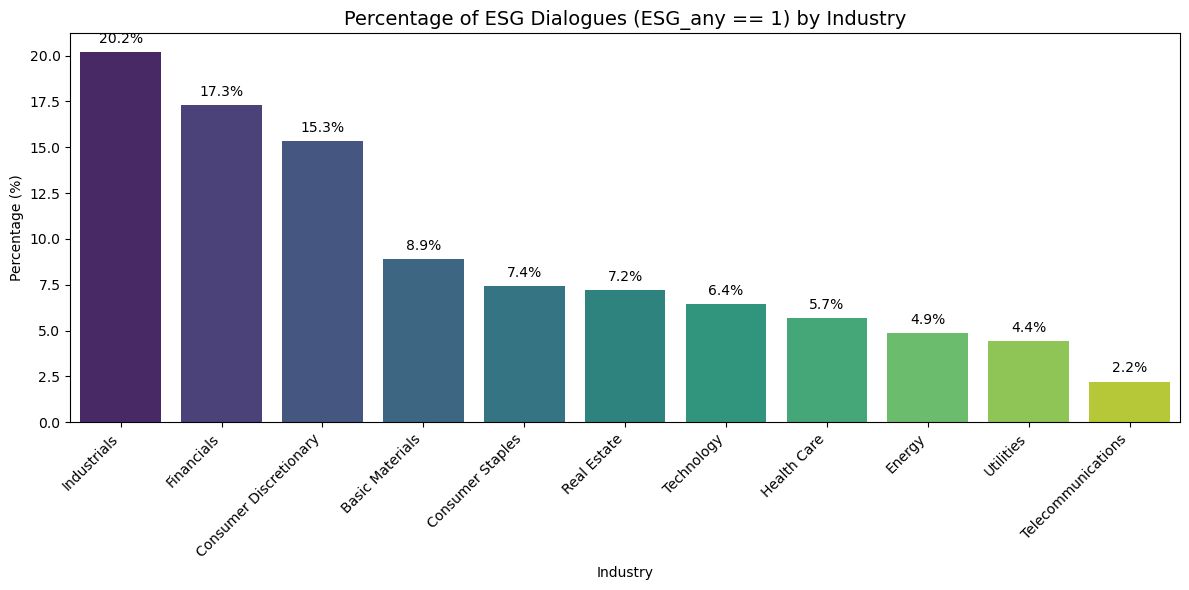

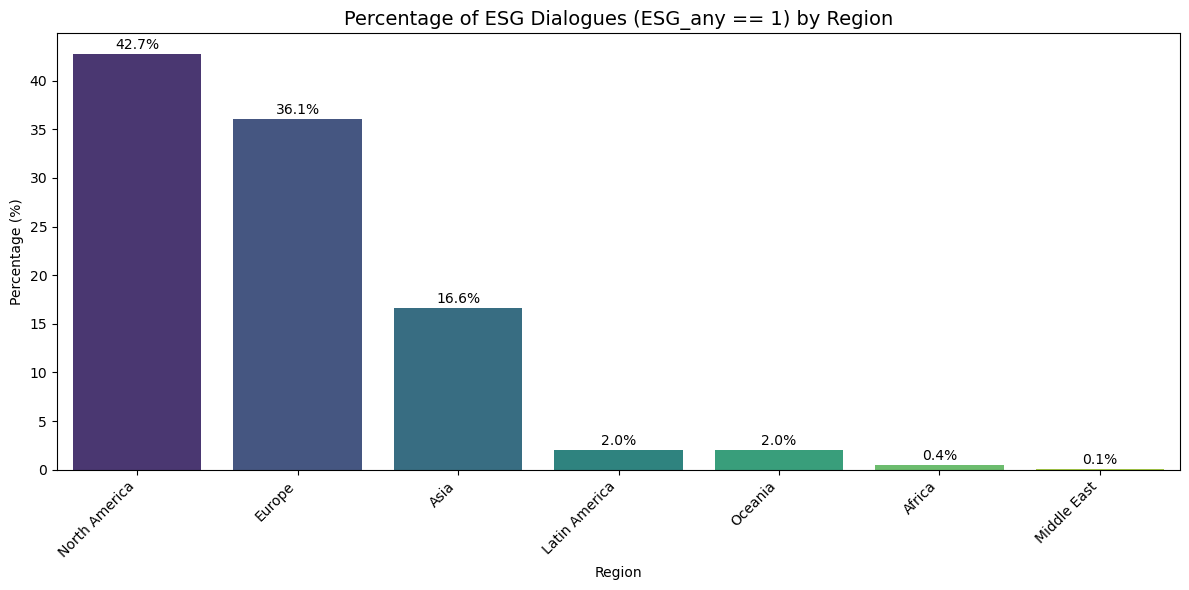

In [ ]:
def plot_esg_percentage(df, category_col):
    """
    Plots the percentage distribution of ESG_any == 1 across a categorical variable.
    Each bar shows the proportion of ESG-engaged companies within that category.
    """
    # Filter only ESG == 1
    esg_df = df[df['ESG_any'] == 1]

    # Calculate percentages
    percentages = (esg_df[category_col]
                   .value_counts(normalize=True)
                   .sort_values(ascending=False) * 100)

    # Convert to DataFrame for easier plotting
    data = pd.DataFrame({'Category': percentages.index, 'Percentage': percentages.values})

    # Plot 
    plt.figure(figsize=(12,6))
    sns.barplot(x='Category', y='Percentage', data=data, palette='viridis')
    plt.title(f'Percentage of ESG Dialogues (ESG_any == 1) by {category_col}', fontsize=14)
    plt.xlabel(category_col)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45, ha='right')

    # Add percentage labels
    for i, v in enumerate(data['Percentage']):
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

# Usage
plot_esg_percentage(fund_esg_2024, 'Industry')
plot_esg_percentage(fund_esg_2024, 'Region')

In [96]:
fund_esg_2024[fund_esg_2024['ESG_any'] ==1].value_counts(normalize=True)

Industry         Region         Country        Name                     Market_Value_USD  Voting  Ownership  Portfolio_Weight  Environmental  Social  Governance  Climate_change  ESG_any
Basic Materials  Africa         South Africa   gold fields ltd          169704075         1.45    1.45       0.013198          1              1       0           0               1          0.00111
Industrials      Asia           Japan          omron corp               41970162          0.60    0.60       0.003264          1              1       1           1               1          0.00111
                 Europe         Germany        deutsche post ag         554757710         1.31    1.31       0.043144          1              0       1           1               1          0.00111
                                               heidelberg materials ag  260204434         1.16    1.16       0.020236          1              1       1           1               1          0.00111
                          

# Preprocessing

## Encoding variables
explicacion de por qué SMOTE NO y cuál estrategia se usará
hacer autoML pero igual Gradient Boosting / XGBoost / LightGBM / CatBoost sirven más para clases desbalanceadas y usar SHAP para interpretar cada feature. Random Forest también. Se hace un ciclo for o AutoML con LazyPredict. PEro primero se hace la de statsmodel, y se contrastan ambas

Sin usar accuracy sino otras metrics como la curva roc o f1

Scaler:
- Market Value: MinMaxScaler
- Busca un ejemplo de mapping personalizado con dict para hacerlo en industry y en region
- NAME se va, porque no aporta nada explicativo.

import shap
import xgboost as xgb

# Example
model = xgb.XGBClassifier(scale_pos_weight=10, random_state=42)
model.fit(X_train_encoded, y_train)

explainer = shap.Explainer(model, X_train_encoded)
shap_values = explainer(X_test_encoded)

# Summary plot
shap.summary_plot(shap_values, X_test_encoded)


haz auto ML o haz regression de statsmodel
recuerda hacer class_weights='balanced' cuando actives el modelo tipo clf = LogisticRegression(class_weight='balanced', random_state=42)

Despite the data being unbalanced, SMOTE techniques will not be used
Problems with SMOTE:

Creates synthetic data that doesn't exist - SMOTE interpolates between existing ESG engagement points, but ESG dialogue is a real corporate event. Fake data corrupts your findings.
Small minority class (~11%) - SMOTE works better when you have at least 20-30% minority. Below that, it tends to overfit.
Binary classification is simple - You don't need synthetic balancing for this imbalanced rati

In [ ]:
#Example of better approach
from sklearn.model_selection import train_test_split

# Train/test split WITH stratification
X_train, X_test, y_train, y_test = train_test_split(
    fund_esg_2024.drop('ESG_any', axis=1),
    fund_esg_2024['ESG_any'],
    test_size=0.2,
    random_state=42,
    stratify=fund_esg_2024['ESG_any']  # ✅ THIS preserves class ratio in both sets
)

# Verify stratification worked
print("Train set distribution:")
print(y_train.value_counts(normalize=True) * 100)
print("\nTest set distribution:")
print(y_test.value_counts(normalize=True) * 100)